In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy
import textacy
import gc
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
plt.rcParams['figure.figsize'] = (24,12)
plt.style.use('ggplot')

In [3]:
nlp = spacy.load('en')

In [4]:
filenames = glob('text/*')
texts = [open(text).read() for text in filenames]
metadata = [{'filename': fn} for fn in filenames]

In [5]:
james = textacy.Corpus('en', texts, metadatas=metadata)

In [6]:
james.save('.', 'james', compression='gzip')

In [2]:
james = textacy.Corpus.load('.', 'james', compression='gzip')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 25: invalid start byte

In [7]:
allSents = []
for doc in james:
    for sent in doc.sents:
        allSents.append((sent, len(sent), doc.metadata['filename']))

In [8]:
def splitSents(n):
    a, b = [], []
    for sent in allSents:
        if sent[1] < n:
            a.append(sent)
        if sent[1] >= n: 
            b.append(sent)
    return a, b

def countWords(sentList):
    return sum([sent[1] for sent in sentList])    

In [121]:
short, long = splitSents(34)


In [122]:
countWords(short), countWords(long)

(1711915, 1646234)

In [123]:
def randomSent(sents):
    return sents[np.random.choice(range(len(short)))]

In [124]:
# Randomly sample from short sentences until we get
# the same wordcount as in long.
shortSample = [randomSent(short)]
print(shortSample)
while countWords(shortSample) < countWords(long): 
    print('\r', countWords(shortSample), end='')
    shortSample.append(randomSent(short))

KeyboardInterrupt: 

 47907

 39494

 27370

 20221

 11528

 4949

 618

[(I'm all right
with her," said Kate., 12, 'text/1902-wings-of-the-dove.txt')]


In [125]:
def makeSoup(sentList):
    justSents = [sent[0] for sent in sentList]
    stringSoup = " ".join([sent.string for sent in justSents])
    return stringSoup

In [126]:
# Try to free up some memory.
james = ""
gc.collect()

37616

In [48]:
short = shortSample

In [127]:
shortSoup = makeSoup(short)
longSoup = makeSoup(long)

In [128]:
shortDoc = textacy.Doc(shortSoup)
longDoc = textacy.Doc(longSoup)

In [129]:
def bag(doc):
    return pd.Series(doc.to_bag_of_terms(lemmatize=True, as_strings=True, weighting='freq', filter_punct=True))

In [130]:
df = pd.DataFrame([bag(shortDoc), bag(longDoc)], index=['short', 'long'])

In [131]:
df = df.fillna(0)

In [55]:
trial3 = (df.loc['short'] - df.loc['long']).sort_values()

In [44]:
trial2 = (df.loc['short'] - df.loc['long']).sort_values()

In [33]:
trial1 = (df.loc['short'] - df.loc['long']).sort_values()

In [57]:
trials = pd.DataFrame([trial1, trial2, trial3])

In [59]:
trials.mean().sort_values()

's           -0.001333
hyacinth     -0.000812
             -0.000630
hour         -0.000610
place        -0.000567
gray         -0.000494
old          -0.000479
air          -0.000412
light        -0.000379
window       -0.000338
high         -0.000336
small        -0.000325
miss         -0.000323
present      -0.000313
person       -0.000309
half         -0.000308
second       -0.000307
new          -0.000303
little       -0.000300
question     -0.000293
low          -0.000289
call         -0.000285
presence     -0.000263
sound        -0.000262
fact         -0.000261
-=-=-        -0.000258
great        -0.000256
particular   -0.000250
english      -0.000248
interest     -0.000242
                ...   
’re           0.000419
wish          0.000440
shall         0.000448
ralph         0.000456
like          0.000476
rowland       0.000493
want          0.000499
yes           0.000507
madame        0.000537
oh            0.000564
speak         0.000635
mr.           0.000644
mrs.       

In [60]:
def POSRepresentation(text): 
    return pd.Series([w.tag_ for w in text.spacy_doc])

In [65]:
shortPOS = POSRepresentation(shortDoc)
longPOS = POSRepresentation(longDoc)

In [66]:
POSs = pd.DataFrame([shortPOS.value_counts(), longPOS.value_counts()], index=['short', 'long'])

In [67]:
POSs

         $      ''       ,  -LRB-  -RRB-       .       :  ADD  AFX      CC  \
short  NaN  1010.0  5629.0   98.0  152.0  5785.0  1642.0  7.0  NaN  2484.0   
long   2.0   386.0  8053.0  292.0  316.0  1244.0  1820.0  4.0  1.0  3270.0   

       ...       VBG     VBN     VBP     VBZ    WDT     WP   WP$    WRB    XX  \
short  ...    1220.0  2170.0  1591.0  1124.0  587.0  614.0  21.0  419.0  14.0   
long   ...    1482.0  2833.0   497.0   320.0  942.0  545.0  58.0  485.0  11.0   

          ``  
short  851.0  
long   382.0  

[2 rows x 50 columns]

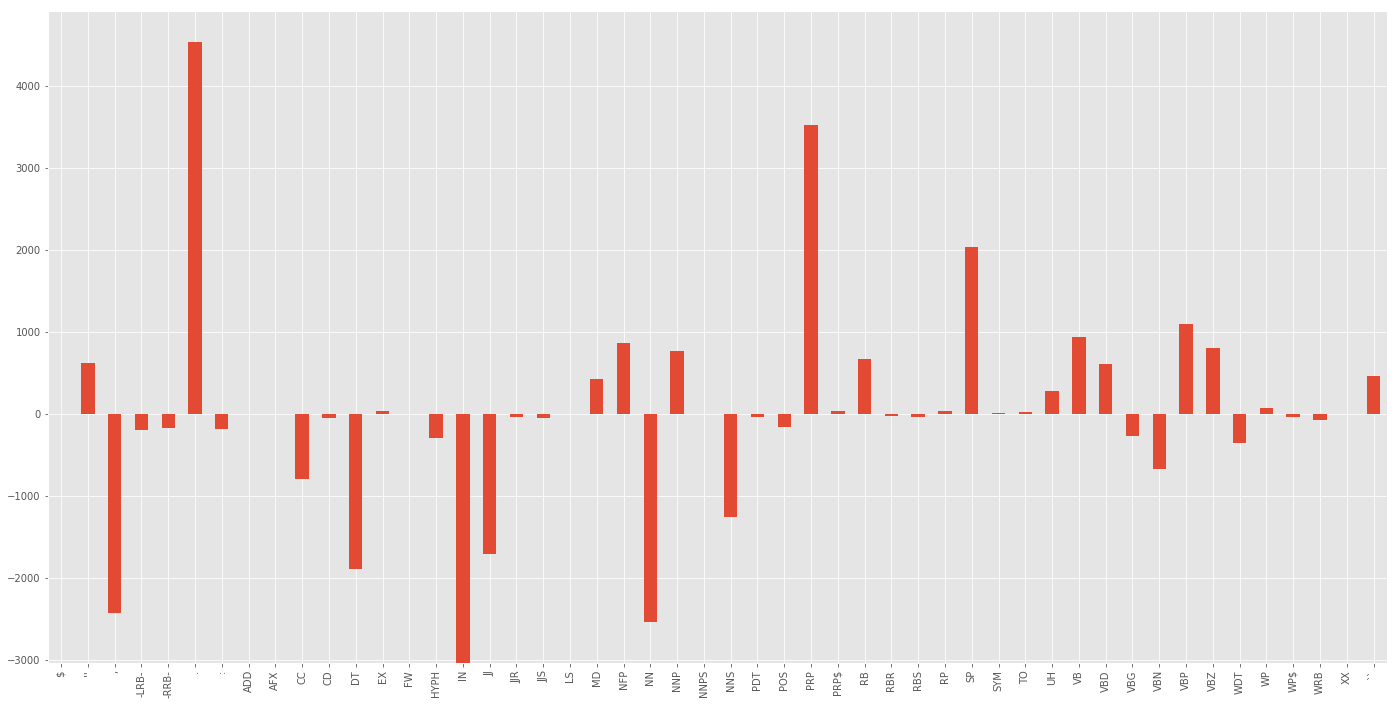

In [68]:
(POSs.loc['short'] - POSs.loc['long']).plot(kind='bar')

In [69]:
POSs.columns[6]

':'

In [100]:
s = short[0][0]
l = long[0][0]

In [102]:
s.start, l.start

(72034, 5444)

In [103]:
shortStarts = [s[0].start for s in short]
longStarts = [s[0].start for s in long]

In [79]:
bins = np.histogram(shortStarts + longStarts)[1]

In [106]:
pd.Series(shortStarts).median()

76350.0

In [107]:
pd.Series(longStarts).median()

78510.5

In [99]:
pd.Series(shortStarts).describe(), pd.Series(longStarts).describe()

(count      4437.000000
 mean      94811.233716
 std       70684.088269
 min          69.000000
 25%       37427.000000
 50%       76350.000000
 75%      141059.000000
 max      296893.000000
 dtype: float64, count       876.000000
 mean      94689.265982
 std       70200.548347
 min          51.000000
 25%       37284.000000
 50%       78510.500000
 75%      145848.250000
 max      269682.000000
 dtype: float64)

# Probabilities

In [136]:
len(short)

107563

In [137]:
shortProbs = [w.prob for sent in short for w in sent[0]]
longProbs = [w.prob for sent in long for w in sent[0]]

In [138]:
pd.Series(shortProbs).describe()

count    1.711915e+06
mean    -7.617426e+00
std      4.460772e+00
min     -1.957931e+01
25%     -8.805295e+00
50%     -6.282995e+00
75%     -4.547973e+00
max     -3.072948e+00
dtype: float64

In [139]:
pd.Series(longProbs).describe()

count    1.646234e+06
mean    -7.770720e+00
std      4.627745e+00
min     -1.957931e+01
25%     -8.939991e+00
50%     -6.282995e+00
75%     -4.547973e+00
max     -3.072948e+00
dtype: float64

In [119]:
shortProbs[:10]

[-6.984047889709473,
 -19.579313278198242,
 -19.579313278198242,
 -9.932953834533691,
 -3.83851957321167,
 -9.752784729003906,
 -6.153740882873535,
 -19.579313278198242,
 -7.133773326873779,
 -6.064945220947266]

In [120]:
longProbs[:10]

[-7.277902603149414,
 -6.634814739227295,
 -6.661053657531738,
 -19.579313278198242,
 -4.585874080657959,
 -3.425445795059204,
 -8.04582691192627,
 -3.3914804458618164,
 -10.912962913513184,
 -19.579313278198242]